In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'H:\Sandeep\DATA SCIENCE\MY Files\house price\Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.size

7085

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df['mainroad']=df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom']=df['guestroom'].map({'yes': 1, 'no': 0})
df['basement']=df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning']=df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea']=df['prefarea'].map({'yes': 1, 'no': 0})


In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [8]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [9]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)


In [10]:
df = pd.concat([df,status],axis=1)
df.drop(['furnishingstatus'],axis=1,inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [11]:
# standardisation of the data mean-0,Std-1

df = (df - df.mean())/df.std()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [12]:
X = df['area']

y = df['price']

In [13]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline

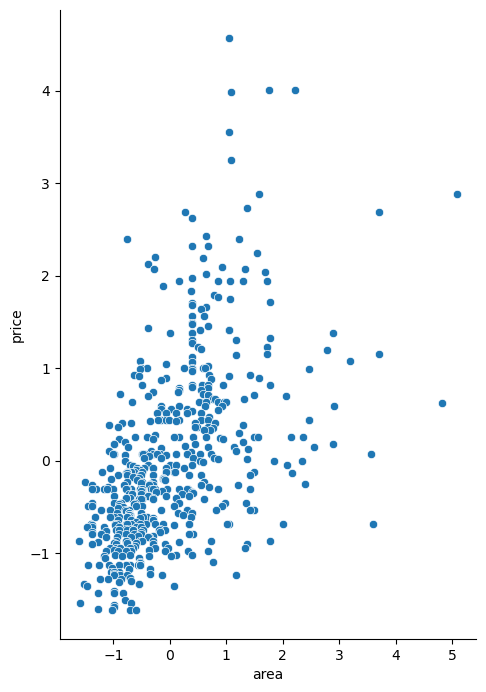

In [14]:
sns.pairplot(df, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

# For linear regression we use a cost function known as the mean squared error or MSE.

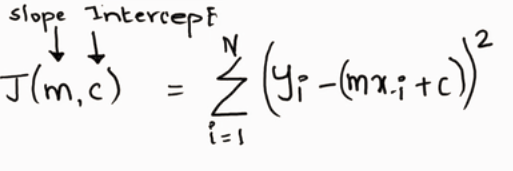

In [15]:
from IPython.display import Image
image1=Image('H:\Sandeep\DATA SCIENCE\MY Files\house price\gd1.png')
image1

Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

In [16]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [17]:
def gradient(X,y,m_current=0,c_current=0,iters=1000,learning_rate=0.01):
    N=float(len(y))
    gd_df=pd.DataFrame(columns=['m_current','c_current','cost'])
    for i in range(iters):
        y_current=(m_current)*X+c_current
        cost=sum([data**2 for data in (y-y_current)])/N
        m_gradient=-(2/N)*sum(X*(y-y_current))
        c_gradient=-(2/N)*sum(y-y_current)
        m_current=m_current-(learning_rate*m_gradient)
        c_current=c_current-(learning_rate*c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)
        

In [18]:
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,5.117211e-18,0.998165
1,0.021187,2.230224e-17,0.986830
2,0.031464,3.243888e-17,0.975943
3,0.041536,3.045067e-17,0.965486
4,0.051407,2.675943e-17,0.955442
...,...,...,...
995,0.535997,2.630312e-16,0.711399
996,0.535997,2.560398e-16,0.711399
997,0.535997,2.557220e-16,0.711399
998,0.535997,2.522997e-16,0.711399


<Axes: xlabel='index'>

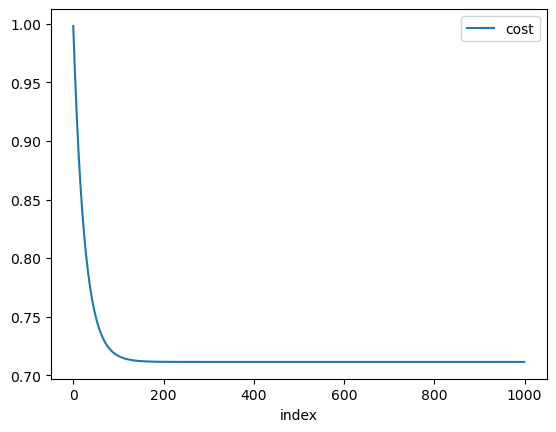

In [19]:
gradients.reset_index().plot.line(x='index',y='cost')


Multiple Regression: Applying Gradient Descent for Multiple (>1) Features

In [20]:
X = df[['area','bedrooms']]

y = df['price']

In [21]:
X['intercept'] = 1

In [22]:
X = X.reindex(['intercept','area','bedrooms'], axis=1)

In [23]:
X

,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131
...,...,...,...
540,1,-0.990968,-1.307661
541,1,-1.267448,0.047235
542,1,-0.705273,-1.307661
543,1,-1.032440,0.047235


In [24]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [47]:
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iteration = 1000

In [48]:
def compute_cost(X,y,theta):
    return  np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [61]:
def gradient_descent_multi(X,y,theta,alpha,iteration):
    theta=np.zeros(X.shape[1])
    m=len(X)
    gdm_df=pd.DataFrame(columns=['betas','cost'])
    for i in range(iteration):
        gradient=(1/m)*np.matmul(X.T,np.matmul(X,theta)-y)
        theta=theta-alpha*gradient
        cost=compute_cost(X,y,theta)
        gdm_df.loc[i]=[theta,cost]
    return gdm_df
        
        
    

In [63]:
gradient_descent_multi(X,y,theta,alpha,iteration)

,betas,cost
0,"[2.3711919278232707e-18, 0.005350138644096793,...",0.494906
1,"[3.617901085750969e-18, 0.010641328951860771, ...",0.490824
2,"[5.785382366854027e-18, 0.015874226967184046, ...",0.486834
3,"[8.075090035989212e-18, 0.021049481374934606, ...",0.482935
4,"[1.0368871918058801e-17, 0.026167733584010238,...",0.479124
...,...,...
995,"[3.3328691488600403e-16, 0.4916558741575689, 0...",0.314176
996,"[3.3359248085608434e-16, 0.49165609672441263, ...",0.314176
997,"[3.337635977993293e-16, 0.4916563172711537, 0....",0.314176
998,"[3.3429324548080186e-16, 0.4916565358164564, 0...",0.314176


<Axes: xlabel='index'>

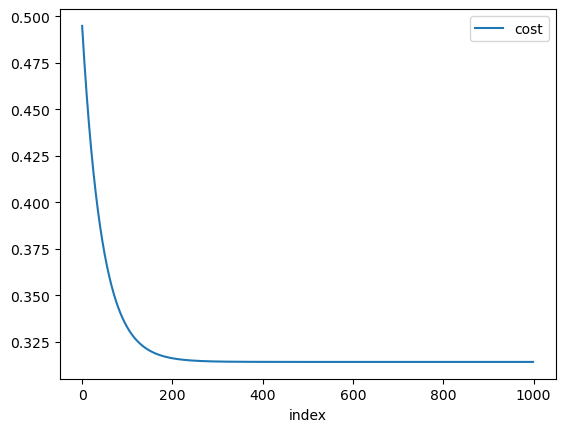

In [65]:
gradient_descent_multi(X,y,theta,alpha,iteration).reset_index().plot.line(x='index',y='cost')